# SLOW

## Setup

### Packages

In [2]:
import numpy as np
from scipy import integrate as integ
from scipy import signal as signal
import sympy as sp
import matplotlib
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt
import seaborn as sns
import ipywidgets
from tqdm import tqdm
###
from turing_model import TuringModel as tm

### Sim Setup

In [3]:
t_end = 20000 #4000  # 100000
number_steps = 10000 #2000  # 25000
t = np.linspace(0, t_end, number_steps)
# dispersal adaptability
k_1 = 5
k_2 = 0
k_1_range = np.geomspace(0.0001, 10, 100)
k_2_range = np.geomspace(0.0001, 10, 100)
# maximum dispersal rate
d_Hmax1 = 10**-2
d_Hmax2 = 10**-2
d_Hmax1_range = np.logspace(-3, -1, 250)
d_Hmax2_range = d_Hmax1_range

# var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 0.08, 0.4, 0, 0, 0, 0, 0, 0]
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)

In [4]:
# Save results
# results = np.zeros((len(d_Hmax1_range),len(d_Hmax2_range)))
density_H1x = np.zeros((len(d_Hmax2_range)))
density_H1y = np.zeros((len(d_Hmax2_range)))
density_H2x = np.zeros((len(d_Hmax2_range)))
density_H2y = np.zeros((len(d_Hmax2_range)))
mode_H1 = np.zeros((len(d_Hmax2_range)))
mode_H2 = np.zeros((len(d_Hmax2_range)))
checkOsc_H1x = np.zeros((len(d_Hmax2_range)))
checkOsc_H1y = np.zeros((len(d_Hmax2_range)))
checkOsc_H2x = np.zeros((len(d_Hmax2_range)))
checkOsc_H2y = np.zeros((len(d_Hmax2_range)))
meandensity_H1x = np.zeros((len(d_Hmax2_range)))
meandensity_H1y = np.zeros((len(d_Hmax2_range)))
meandensity_H2x = np.zeros((len(d_Hmax2_range)))
meandensity_H2y = np.zeros((len(d_Hmax2_range)))
autodensity_Ax = np.zeros((len(d_Hmax2_range)))
autodensity_Ay = np.zeros((len(d_Hmax2_range)))
autodensityOsc_Ax = np.zeros((len(d_Hmax2_range)))
autodensityOsc_Ay = np.zeros((len(d_Hmax2_range)))
H1xmax = np.zeros((len(d_Hmax2_range)))
H2xmax = np.zeros((len(d_Hmax2_range)))
H1xmin = np.zeros((len(d_Hmax2_range)))
H2xmin = np.zeros((len(d_Hmax2_range)))
total_H1 = np.zeros((len(d_Hmax2_range)))
total_H2 = np.zeros((len(d_Hmax2_range)))
invasion = np.zeros((len(d_Hmax2_range)))
# save initial values in an array
initials = np.array(var0)

In [37]:
# Integrating over one variable parameter
i = 0
j = 0

for d_Hmax1 in tqdm(d_Hmax1_range):
    d_Hmax2 = d_Hmax1
    model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

    # results[i,j] = ...
    density_H1x[i] = var[-1, 4]
    density_H1y[i] = var[-1, 5]
    density_H2x[i] = var[-1, 6]
    density_H2y[i] = var[-1, 7]

    checkOsc_H1x[i] = np.var(var[-200:-1, 4])
    checkOsc_H1y[i] = np.var(var[-200:-1, 5])
    checkOsc_H2x[i] = np.var(var[-200:-1, 6])
    checkOsc_H2y[i] = np.var(var[-200:-1, 7])

    meandensity_H1x[i] = np.mean(var[-200:-1, 4])
    meandensity_H1y[i] = np.mean(var[-200:-1, 5])
    meandensity_H2x[i] = np.mean(var[-200:-1, 6])
    meandensity_H2y[i] = np.mean(var[-200:-1, 7])

    autodensity_Ax[i] = np.mean(var[-200:-1, 2])
    autodensity_Ay[i] = np.mean(var[-200:-1, 3])

    autodensityOsc_Ax[i] = np.var(var[-200:-1, 2])
    autodensityOsc_Ay[i] = np.var(var[-200:-1, 3])

    H1xmax[i] = max(var[-200:-1, 4])
    H2xmax[i] = max(var[-200:-1, 6])
    H1xmin[i] = min(var[-200:-1, 4])
    H2xmin[i] = min(var[-200:-1, 6])

    i += 1

  0%|          | 0/250 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# Integrating over two variable parameters
# change for new method with equation wrapper

var = []

i = 0
j = 0

for d_Hmax2 in tqdm(d_Hmax2_range):
    j = 0
    for d_Hmax1 in d_Hmax1_range:
        model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
        var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

        # results[i,j] = ...
        density_H1x[i, j] = var[-1, 4]
        density_H1y[i, j] = var[-1, 5]
        density_H2x[i, j] = var[-1, 6]
        density_H2y[i, j] = var[-1, 7]

        checkOsc_H1x[i, j] = np.var(var[-200:-1, 4])
        checkOsc_H1y[i, j] = np.var(var[-200:-1, 5])
        checkOsc_H2x[i, j] = np.var(var[-200:-1, 6])
        checkOsc_H2y[i, j] = np.var(var[-200:-1, 7])

        meandensity_H1x[i, j] = np.mean(var[-200:-1, 4])
        meandensity_H1y[i, j] = np.mean(var[-200:-1, 5])
        meandensity_H2x[i, j] = np.mean(var[-200:-1, 6])
        meandensity_H2y[i, j] = np.mean(var[-200:-1, 7])

        autodensity_Ax[i, j] = np.mean(var[-200:-1, 2])
        autodensity_Ay[i, j] = np.mean(var[-200:-1, 3])

        autodensityOsc_Ax[i, j] = np.var(var[-200:-1, 2])
        autodensityOsc_Ay[i, j] = np.var(var[-200:-1, 3])

        H1xmax[i, j] = max(var[-200:-1, 4])
        H2xmax[i, j] = max(var[-200:-1, 6])

        j += 1
    i += 1

  0%|          | 0/100 [00:00<?, ?it/s]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

## Load/Save

In [5]:
# save lib is not final yet since depending on the task, further additions may be needed.
# The model is already saving a bunch of other data and I'm not sure if they are needed.
save_lib = {
    "density_H1x": density_H1x,
    "density_H1y": density_H1y,
    "density_H2x": density_H2x,
    "density_H2y": density_H2y,
    "checkOsc_H1x": checkOsc_H1x,
    "checkOsc_H1y": checkOsc_H1y,
    "checkOsc_H2x": checkOsc_H2x,
    "checkOsc_H2y": checkOsc_H2y,
    "meandensity_H1x": meandensity_H1x,
    "meandensity_H1y": meandensity_H1y,
    "meandensity_H2x": meandensity_H2x,
    "meandensity_H2y": meandensity_H2y,
    "autodensity_Ax": autodensity_Ax,
    "autodensity_Ay": autodensity_Ay,
    "autodensityOsc_Ax": autodensityOsc_Ax,
    "autodensityOsc_Ay": autodensityOsc_Ay,
    "H1xmax": H1xmax,
    "H2xmax": H2xmax,
    "H1xmin": H1xmin,
    "H2xmin": H2xmin,
    "initials": initials
}
# tm.savedata("foldername", save_lib)
load_list = ["density_H1x", "density_H1y", "density_H2x", "density_H2y", "checkOsc_H1x", "checkOsc_H1y", "checkOsc_H2x", "checkOsc_H2y", "meandensity_H1x",
             "meandensity_H1y", "meandensity_H2x", "meandensity_H2y", "autodensity_Ax", "autodensity_Ay", "autodensityOsc_Ax", "autodensityOsc_Ay", "initials"]
# tm.loaddata("foldername", load_list)

## Results
### Heatmaps
#### Iterating over max dispersal speed dHmax

C:\Users\rmjar\AppData\Local\Temp\ipykernel_16864\1262331428.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


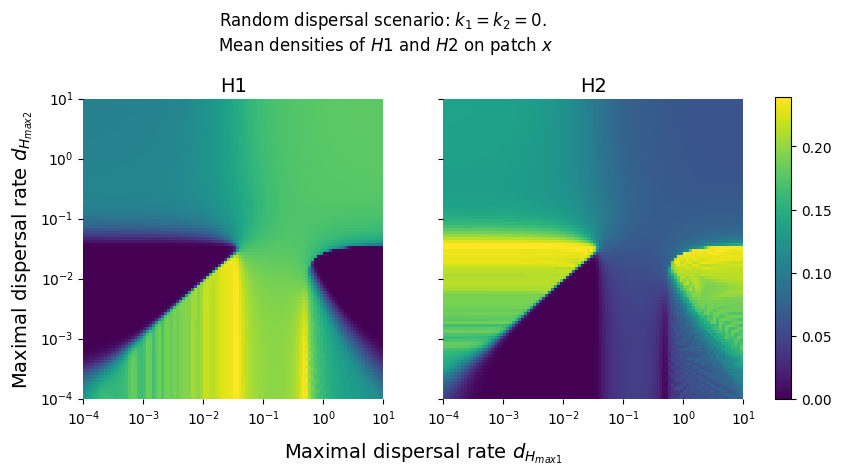

In [ ]:
# Random dispersal scenario
# Heatmap: Iterating over dHmax1 and dHmax2 for k1 = k2 = 0.
ld = tm.loaddata("k1equalsk2", ["meandensity_H1x", "meandensity_H2x"])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8), gridspec_kw={'top': 1.25})

sns.heatmap(ld["meandensity_H1x"], cmap="viridis",
            square=True, cbar=False, ax=ax1, vmin=0, vmax=np.max(ld["meandensity_H1x"]))
ax1.set_ylabel("Maximal dispersal rate $d_{H_{max2}}$", fontsize=14)
ax1.invert_yaxis()
ax1.set_xticks(np.linspace(0, len(d_Hmax1_range), 6))
ax1.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$10^{-2}$",
                    "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
ax1.set_yticks(np.linspace(0, len(d_Hmax1_range), 6))
ax1.set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
ax1.set_title("H1", fontsize=14)

sns.heatmap(ld["meandensity_H2x"], cmap="viridis",
            square=True, cbar=False, ax=ax2, vmin=0, vmax=np.max(ld["meandensity_H1x"]))
ax2.invert_yaxis()
ax2.set_xticks(np.linspace(0, len(d_Hmax1_range), 6))
ax2.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$10^{-2}$",
                    "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
ax2.set_yticks(np.linspace(0, len(d_Hmax1_range), 6))
ax2.set_title("H2", fontsize=14)

fig.text(
    0.55, 0.42, 'Maximal dispersal rate $d_{H_{max1}}$', ha='center', fontsize=14)
fig.subplots_adjust(right=0.95)
cb_ax = fig.add_axes([0.99, 0.493, 0.02, 0.377])
cbar = fig.colorbar(ax1.get_children()[0], cax=cb_ax)
fig.suptitle(
    "Random dispersal scenario: $k_1 = k_2 = 0$. \n Mean densities of $H1$ and $H2$ on patch $x$")
fig.tight_layout()

C:\Users\rmjar\AppData\Local\Temp\ipykernel_12164\3934124723.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


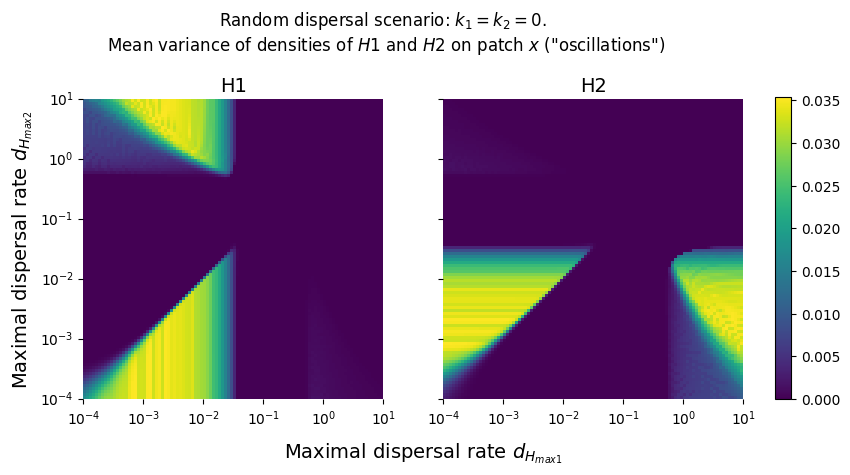

In [ ]:
# Random dispersal scenario
# Heatmap: Checking for oscillations
# Oscillations are checked by comparing variance in the heterotroph densities over the last 200 time steps.
ld = tm.loaddata("k1equalsk2", ["checkOsc_H1x", "checkOsc_H2x"])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8), gridspec_kw={'top': 1.25})

sns.heatmap(ld["checkOsc_H1x"], cmap="viridis", square=True,
            cbar=False, ax=ax1, vmin=0, vmax=np.max(ld["checkOsc_H1x"]))
ax1.set_ylabel("Maximal dispersal rate $d_{H_{max2}}$", fontsize=14)
ax1.invert_yaxis()
ax1.set_xticks(np.linspace(0, len(d_Hmax1_range), 6))
ax1.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$10^{-2}$",
                    "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
ax1.set_yticks(np.linspace(0, len(d_Hmax1_range), 6))
ax1.set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
ax1.set_title("H1", fontsize=14)

sns.heatmap(ld["checkOsc_H2x"], cmap="viridis", square=True,
            cbar=False, ax=ax2, vmin=0, vmax=np.max(ld["checkOsc_H1x"]))
ax2.invert_yaxis()
ax2.set_xticks(np.linspace(0, len(d_Hmax1_range), 6))
ax2.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$10^{-2}$",
                    "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
ax2.set_yticks(np.linspace(0, len(d_Hmax1_range), 6))
ax2.set_title("H2", fontsize=14)

fig.text(
    0.55, 0.42, 'Maximal dispersal rate $d_{H_{max1}}$', ha='center', fontsize=14)
fig.subplots_adjust(right=0.95)
cb_ax = fig.add_axes([0.99, 0.493, 0.02, 0.377])
cbar = fig.colorbar(ax1.get_children()[0], cax=cb_ax)
fig.suptitle("Random dispersal scenario: $k_1 = k_2 = 0$. \n Mean variance of densities of $H1$ and $H2$ on patch $x$ (\"oscillations\")")
fig.tight_layout()

C:\Users\rmjar\AppData\Local\Temp\ipykernel_16864\1351474246.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


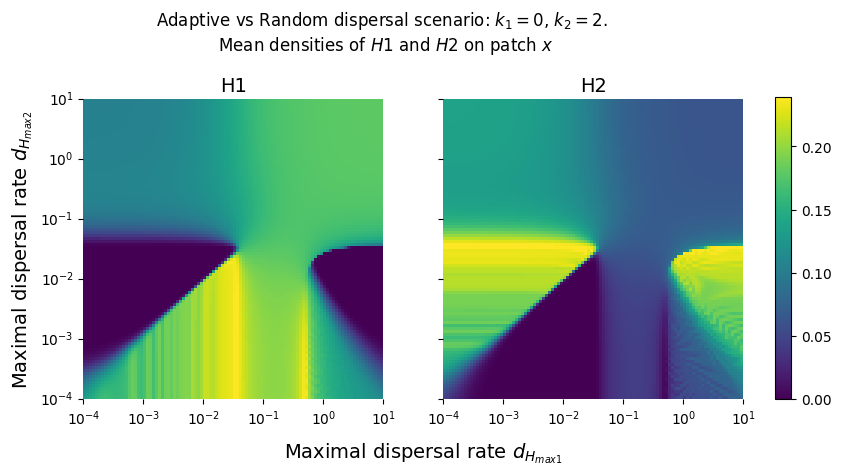

In [ ]:
# Adaptive vs Random dispersal scenario
# Heatmap: Iterating over dHmax1 and dHmax2 for k1 = k2 = 0.
ld = tm.loaddata("different_k", ["meandensity_H1x", "meandensity_H2x"])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8), gridspec_kw={'top': 1.25})

sns.heatmap(ld["meandensity_H1x"], cmap="viridis",
            square=True, cbar=False, ax=ax1, vmin=0, vmax=np.max(ld["meandensity_H1x"]))
ax1.set_ylabel("Maximal dispersal rate $d_{H_{max2}}$", fontsize=14)
ax1.invert_yaxis()
ax1.set_xticks(np.linspace(0, len(d_Hmax1_range), 6))
ax1.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$10^{-2}$",
                    "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
ax1.set_yticks(np.linspace(0, len(d_Hmax1_range), 6))
ax1.set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
ax1.set_title("H1", fontsize=14)

sns.heatmap(ld["meandensity_H2x"], cmap="viridis",
            square=True, cbar=False, ax=ax2, vmin=0, vmax=np.max(ld["meandensity_H1x"]))
ax2.invert_yaxis()
ax2.set_xticks(np.linspace(0, len(d_Hmax1_range), 6))
ax2.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$10^{-2}$",
                    "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
ax2.set_yticks(np.linspace(0, len(d_Hmax1_range), 6))
ax2.set_title("H2", fontsize=14)

fig.text(
    0.55, 0.42, 'Maximal dispersal rate $d_{H_{max1}}$', ha='center', fontsize=14)
fig.subplots_adjust(right=0.95)
cb_ax = fig.add_axes([0.99, 0.493, 0.02, 0.377])
cbar = fig.colorbar(ax1.get_children()[0], cax=cb_ax)
fig.suptitle(
    "Adaptive vs Random dispersal scenario: $k_1 = 0$, $k_2 = 2$. \n Mean densities of $H1$ and $H2$ on patch $x$")
fig.tight_layout()

C:\Users\rmjar\AppData\Local\Temp\ipykernel_12164\3787424772.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


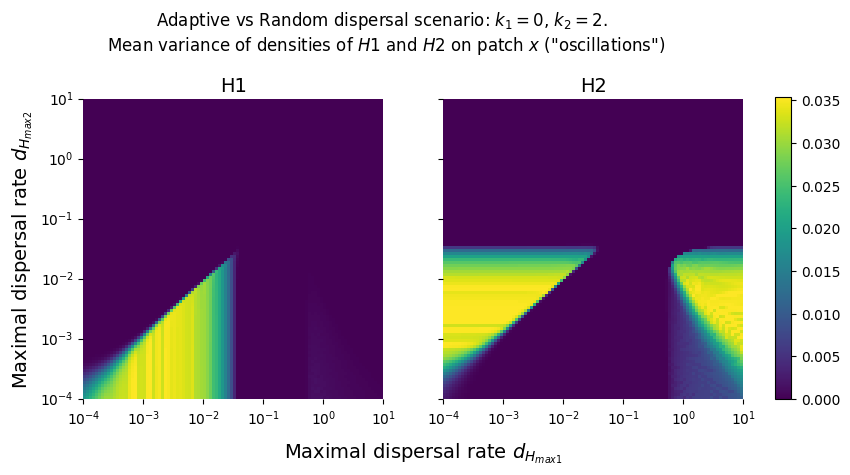

In [ ]:
# Adaptive vs Random dispersal scenario
# Heatmap: Checking for oscillations
# Oscillations are checked by comparing variance in the heterotroph densities over the last 200 time steps.
ld = tm.loaddata("different_k", ["checkOsc_H1x", "checkOsc_H2x"])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8), gridspec_kw={'top': 1.25})

sns.heatmap(ld["checkOsc_H1x"], cmap="viridis", square=True,
            cbar=False, ax=ax1, vmin=0, vmax=np.max(ld["checkOsc_H1x"]))
ax1.set_ylabel("Maximal dispersal rate $d_{H_{max2}}$", fontsize=14)
ax1.invert_yaxis()
ax1.set_xticks(np.linspace(0, len(d_Hmax1_range), 6))
ax1.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$10^{-2}$",
                    "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
ax1.set_yticks(np.linspace(0, len(d_Hmax1_range), 6))
ax1.set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
ax1.set_title("H1", fontsize=14)

sns.heatmap(ld["checkOsc_H2x"], cmap="viridis", square=True,
            cbar=False, ax=ax2, vmin=0, vmax=np.max(ld["checkOsc_H1x"]))
ax2.invert_yaxis()
ax2.set_xticks(np.linspace(0, len(d_Hmax1_range), 6))
ax2.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$10^{-2}$",
                    "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
ax2.set_yticks(np.linspace(0, len(d_Hmax1_range), 6))
ax2.set_title("H2", fontsize=14)

fig.text(
    0.55, 0.42, 'Maximal dispersal rate $d_{H_{max1}}$', ha='center', fontsize=14)
fig.subplots_adjust(right=0.95)
cb_ax = fig.add_axes([0.99, 0.493, 0.02, 0.377])
cbar = fig.colorbar(ax1.get_children()[0], cax=cb_ax)
fig.suptitle("Adaptive vs Random dispersal scenario: $k_1 = 0$, $k_2 = 2$. \n Mean variance of densities of $H1$ and $H2$ on patch $x$ (\"oscillations\")")
fig.tight_layout()

#### Iterating over sensitivity k

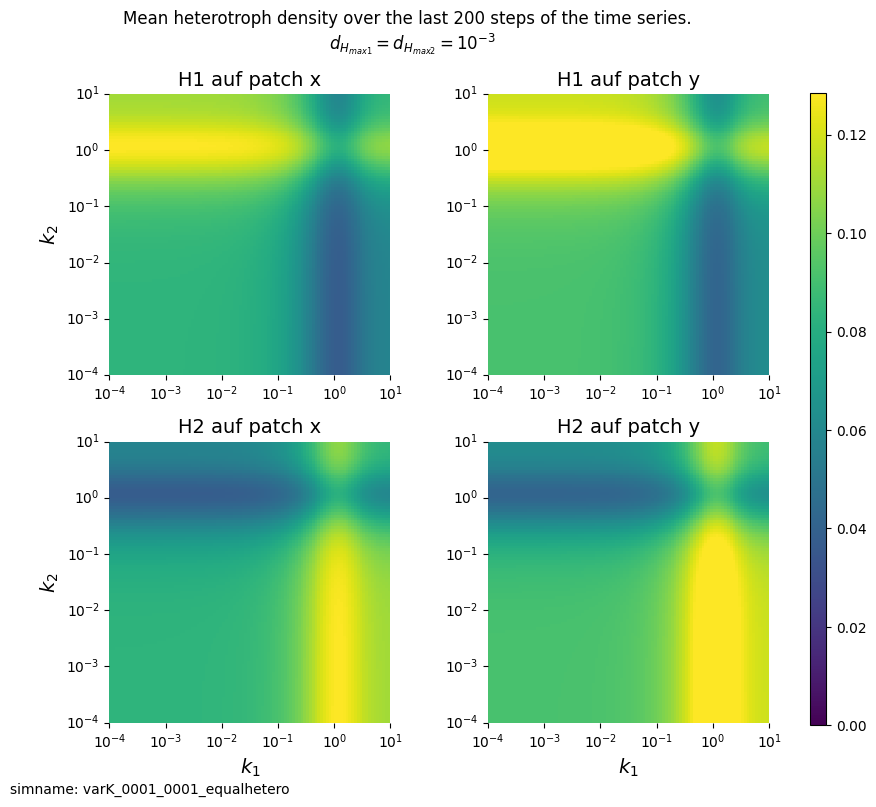

In [ ]:
ld = tm.loaddata("varK_0001_0001_equalhetero", [
                 "meandensity_H1x", "meandensity_H1y", "meandensity_H2x", "meandensity_H2y"])

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

sns.heatmap(ld["meandensity_H1x"], cmap="viridis", square=True, vmin=0,
            vmax=np.max(ld["meandensity_H1x"]), cbar=False, ax=axes[0, 0])
axes[0, 0].invert_yaxis()
axes[0, 0].set_xticks(np.linspace(0, len(k_1_range), 6))
axes[0, 0].set_xticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
axes[0, 0].set_yticks(np.linspace(0, len(k_1_range), 6))
axes[0, 0].set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
axes[0, 0].set_ylabel("$k_2$", fontsize=14)
axes[0, 0].set_title("H1 auf patch x", fontsize=14)

sns.heatmap(ld["meandensity_H1y"], cmap="viridis", square=True, vmin=0,
            vmax=np.max(ld["meandensity_H1x"]), cbar=False, ax=axes[0, 1])
axes[0, 1].invert_yaxis()
axes[0, 1].set_xticks(np.linspace(0, len(k_1_range), 6))
axes[0, 1].set_xticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
axes[0, 1].set_yticks(np.linspace(0, len(k_1_range), 6))
axes[0, 1].set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
axes[0, 1].set_title("H1 auf patch y", fontsize=14)

sns.heatmap(ld["meandensity_H2x"], cmap="viridis", square=True, vmin=0,
            vmax=np.max(ld["meandensity_H1x"]), cbar=False, ax=axes[1, 0])
axes[1, 0].invert_yaxis()
axes[1, 0].set_xticks(np.linspace(0, len(k_1_range), 6))
axes[1, 0].set_xticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
axes[1, 0].set_yticks(np.linspace(0, len(k_1_range), 6))
axes[1, 0].set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
axes[1, 0].set_ylabel("$k_2$", fontsize=14)
axes[1, 0].set_xlabel("$k_1$", fontsize=14)
axes[1, 0].set_title("H2 auf patch x", fontsize=14)

sns.heatmap(ld["meandensity_H2y"], cmap="viridis", square=True, vmin=0,
            vmax=np.max(ld["meandensity_H1x"]), cbar=False, ax=axes[1, 1])
axes[1, 1].invert_yaxis()
axes[1, 1].set_xticks(np.linspace(0, len(k_1_range), 6))
axes[1, 1].set_xticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
axes[1, 1].set_yticks(np.linspace(0, len(k_1_range), 6))
axes[1, 1].set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
axes[1, 1].set_xlabel("$k_1$", fontsize=14)
axes[1, 1].set_title("H2 auf patch y", fontsize=14)

plt.suptitle(
    "Mean heterotroph density over the last 200 steps of the time series. \n $d_{H_{max1}} = d_{H_{max2}} = 10^{-3}$")
plt.tight_layout()
plt.figtext(0, 0, "simname: varK_0001_0001_equalhetero")
cb_ax = fig.add_axes([1, 0.0857, 0.02, 0.79])
cbar = fig.colorbar(axes[0, 0].get_children()[0], cax=cb_ax)

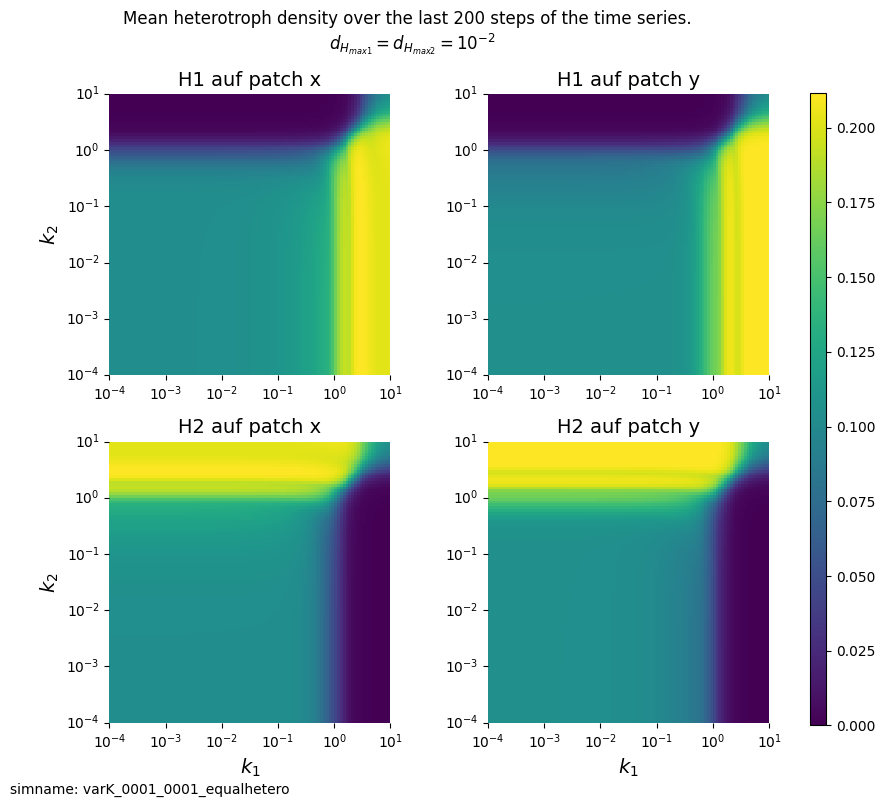

In [ ]:
ld = tm.loaddata("varK_001_001_equalhetero", [
                 "meandensity_H1x", "meandensity_H1y", "meandensity_H2x", "meandensity_H2y"])

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

sns.heatmap(ld["meandensity_H1x"], cmap="viridis", square=True, vmin=0,
            vmax=np.max(ld["meandensity_H1x"]), cbar=False, ax=axes[0, 0])
axes[0, 0].invert_yaxis()
axes[0, 0].set_xticks(np.linspace(0, len(k_1_range), 6))
axes[0, 0].set_xticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
axes[0, 0].set_yticks(np.linspace(0, len(k_1_range), 6))
axes[0, 0].set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
axes[0, 0].set_ylabel("$k_2$", fontsize=14)
axes[0, 0].set_title("H1 auf patch x", fontsize=14)

sns.heatmap(ld["meandensity_H1y"], cmap="viridis", square=True, vmin=0,
            vmax=np.max(ld["meandensity_H1x"]), cbar=False, ax=axes[0, 1])
axes[0, 1].invert_yaxis()
axes[0, 1].set_xticks(np.linspace(0, len(k_1_range), 6))
axes[0, 1].set_xticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
axes[0, 1].set_yticks(np.linspace(0, len(k_1_range), 6))
axes[0, 1].set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
axes[0, 1].set_title("H1 auf patch y", fontsize=14)

sns.heatmap(ld["meandensity_H2x"], cmap="viridis", square=True, vmin=0,
            vmax=np.max(ld["meandensity_H1x"]), cbar=False, ax=axes[1, 0])
axes[1, 0].invert_yaxis()
axes[1, 0].set_xticks(np.linspace(0, len(k_1_range), 6))
axes[1, 0].set_xticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
axes[1, 0].set_yticks(np.linspace(0, len(k_1_range), 6))
axes[1, 0].set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
axes[1, 0].set_ylabel("$k_2$", fontsize=14)
axes[1, 0].set_xlabel("$k_1$", fontsize=14)
axes[1, 0].set_title("H2 auf patch x", fontsize=14)

sns.heatmap(ld["meandensity_H2y"], cmap="viridis", square=True, vmin=0,
            vmax=np.max(ld["meandensity_H1x"]), cbar=False, ax=axes[1, 1])
axes[1, 1].invert_yaxis()
axes[1, 1].set_xticks(np.linspace(0, len(k_1_range), 6))
axes[1, 1].set_xticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
axes[1, 1].set_yticks(np.linspace(0, len(k_1_range), 6))
axes[1, 1].set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
axes[1, 1].set_xlabel("$k_1$", fontsize=14)
axes[1, 1].set_title("H2 auf patch y", fontsize=14)

plt.suptitle(
    "Mean heterotroph density over the last 200 steps of the time series. \n $d_{H_{max1}} = d_{H_{max2}} = 10^{-2}$")
plt.tight_layout()
plt.figtext(0, 0, "simname: varK_0001_0001_equalhetero")
cb_ax = fig.add_axes([1, 0.0857, 0.02, 0.79])
cbar = fig.colorbar(axes[0, 0].get_children()[0], cax=cb_ax)

In [ ]:
# ld = tm.loaddata("varK_001_001_equalhetero", ["meandensity_H1x", "meandensity_H1y", "meandensity_H2x", "meandensity_H2y"])
# doesnt exist yet

### Transition of superior strategy
When comparing an adaptively dispersing competitor to a randomly dispersing one, there is a transtition of the superior strategy between $10^{-3}$ and $10^{-2}$.
At lower dispersal maxima, the randomly dispersing competitor is superior, while at higher dispersal maxima, the adaptively dispersing competitor is superior.

Text(0, 0, 'simname: bifurcation-transition')

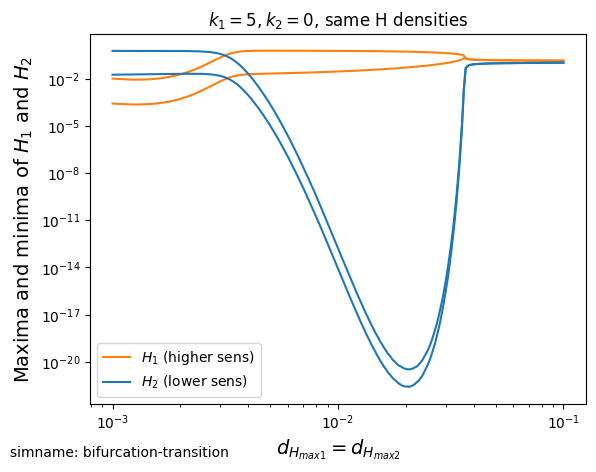

In [ ]:
# t_end = 20000, number_steps = 10000
# k_1 = 5, k_2 = 0, d_Hmax1 = d_Hmax2 = 10**-3 -> 10**-1
# 250 values of dHmax1, dHmax2
# heterotroph densities are equal
d_Hmax1_range = np.logspace(-3, -1, 250)
ld = tm.loaddata("bifurcation-transition", [
                 "H1xmax", "H1xmin", "H2xmax", "H2xmin"])

plt.plot(d_Hmax1_range,ld["H1xmax"],'-', color="#FF7F0E", label="$H_{1}$ (higher sens)")
plt.plot(d_Hmax1_range,ld["H1xmin"],'-', color="#FF7F0E")
plt.plot(d_Hmax1_range,ld["H2xmax"],'-', color="#1F77B4", label="$H_{2}$ (lower sens)")
plt.plot(d_Hmax1_range,ld["H2xmin"],'-', color="#1F77B4")
#plt.plot([0.01, 0.01], [0, 0.6], '--', color="grey", label="$d_{H_{max1}} = d_{H_{max2}}$")
#plt.plot([10**-3, 10**-1], [(10**-6), (10**-6)],'-', color="grey")
plt.xlabel("$d_{H_{max1}} = d_{H_{max2}}$", fontsize=14)
plt.ylabel("Maxima and minima of $H_1$ and $H_2$", fontsize=14)
plt.legend()
plt.title("$k_1 = 5, k_2 = 0$, same H densities")
plt.xscale("log")
plt.yscale("log")
plt.figtext(0, 0, "simname: bifurcation-transition")
# while there are differences in densities at the end of the range of dHmax, 
# the trajectory of both heterotrophs seems to approach the same equilibrium

Text(0.5, 0.98, '$k1 = $5, $k2 = $0, $dHmax1 = dHmax2 = $0.001. All graphs show the same time series.\n Shown are heterotroph densities of both competitors on one patch.')

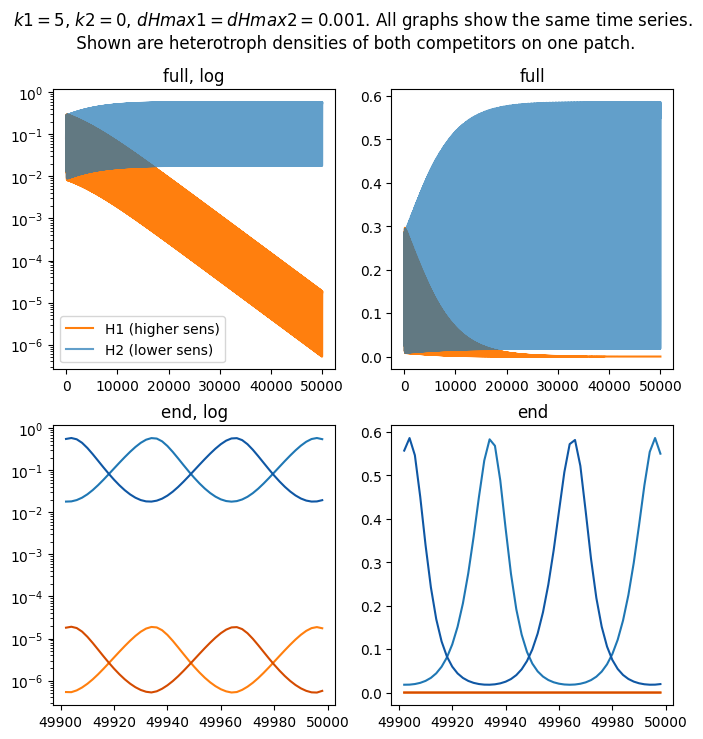

In [ ]:
t_end = 50000
number_steps = 25000
t = np.linspace(0, t_end, number_steps)
k_1 = 5
k_2 = 0
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3
#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 0.08, 0.4, 0, 0, 0, 0, 0, 0]
#plt.figure(figsize=(8,8))
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(8,8))
ax1.set_title("full, log")
ax1.plot(t[-25000:-1], (var[-25000:-1:, 4]),label="H1 (higher sens)", color="#FF7F0E")
ax1.plot(t[-25000:-1], (var[-25000:-1:, 6]), label="H2 (lower sens)", color="#1F77B4", alpha=0.7)
ax1.set_yscale("log")
ax1.legend()
ax2.set_title("full")
ax2.plot(t[-25000:-1], (var[-25000:-1:, 4]), color="#FF7F0E")
ax2.plot(t[-25000:-1], (var[-25000:-1:, 6]), color="#1F77B4", alpha=0.7)
ax3.set_title("end, log")
ax3.plot(t[-50:-1], (var[-50:-1:, 4]), color="#FF7F0E")
ax3.plot(t[-50:-1], (var[-50:-1:, 5]), color="#D44B00")
ax3.plot(t[-50:-1], (var[-50:-1:, 6]), color="#1F77B4")
ax3.plot(t[-50:-1], (var[-50:-1:, 7]), color="#0F57A4")
ax3.set_yscale("log")
ax4.set_title("end")
ax4.plot(t[-50:-1], (var[-50:-1:, 4]), color="#FF7F0E")
ax4.plot(t[-50:-1], (var[-50:-1:, 5]), color="#D44B00")
ax4.plot(t[-50:-1], (var[-50:-1:, 6]), color="#1F77B4")
ax4.plot(t[-50:-1], (var[-50:-1:, 7]), color="#0F57A4")
plt.suptitle("$k1 = $" + str(k_1) + ", $k2 = $" + str(k_2) + 
             ", $dHmax1 = dHmax2 = $" + repr(d_Hmax1) + 
             ". All graphs show the same time series." +
             "\n Shown are heterotroph densities of both competitors on one patch.")

Text(0.5, 0.98, '$k1 = $5, $k2 = $0, $dHmax1 = dHmax2 = $0.01. All graphs show the same time series.\n Shown are heterotroph densities of both competitors on one patch.')

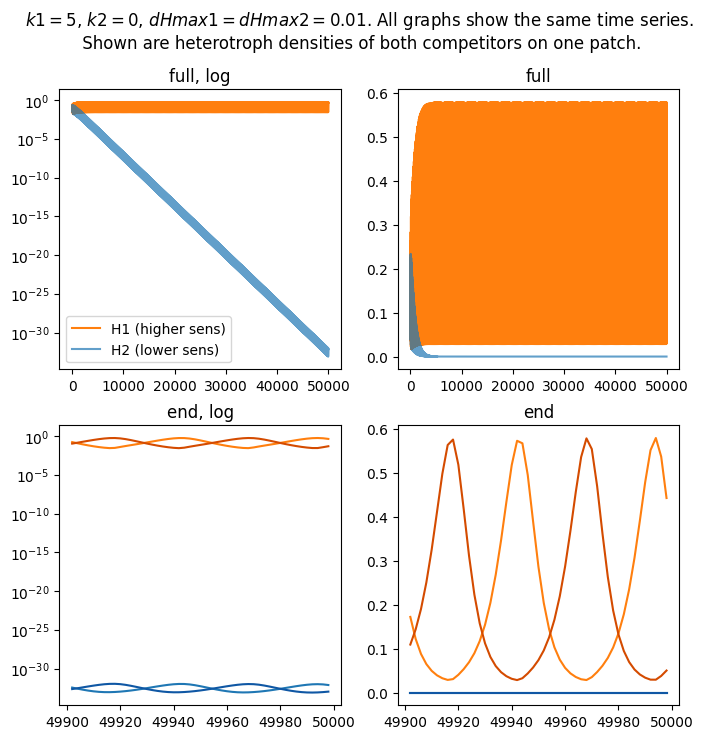

In [ ]:
t_end = 50000
number_steps = 25000
t = np.linspace(0, t_end, number_steps)
k_1 = 5
k_2 = 0
d_Hmax1 = 10**-2
d_Hmax2 = 10**-2
#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 0.08, 0.4, 0, 0, 0, 0, 0, 0]
#plt.figure(figsize=(8,8))
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(8,8))
ax1.set_title("full, log")
ax1.plot(t[-25000:-1], (var[-25000:-1:, 4]),label="H1 (higher sens)", color="#FF7F0E")
ax1.plot(t[-25000:-1], (var[-25000:-1:, 6]), label="H2 (lower sens)", color="#1F77B4", alpha=0.7)
ax1.set_yscale("log")
ax1.legend()
ax2.set_title("full")
ax2.plot(t[-25000:-1], (var[-25000:-1:, 4]), color="#FF7F0E")
ax2.plot(t[-25000:-1], (var[-25000:-1:, 6]), color="#1F77B4", alpha=0.7)
ax3.set_title("end, log")
ax3.plot(t[-50:-1], (var[-50:-1:, 4]), color="#FF7F0E")
ax3.plot(t[-50:-1], (var[-50:-1:, 5]), color="#D44B00")
ax3.plot(t[-50:-1], (var[-50:-1:, 6]), color="#1F77B4")
ax3.plot(t[-50:-1], (var[-50:-1:, 7]), color="#0F57A4")
ax3.set_yscale("log")
ax4.set_title("end")
ax4.plot(t[-50:-1], (var[-50:-1:, 4]), color="#FF7F0E")
ax4.plot(t[-50:-1], (var[-50:-1:, 5]), color="#D44B00")
ax4.plot(t[-50:-1], (var[-50:-1:, 6]), color="#1F77B4")
ax4.plot(t[-50:-1], (var[-50:-1:, 7]), color="#0F57A4")
plt.suptitle("$k1 = $" + str(k_1) + ", $k2 = $" + str(k_2) + 
             ", $dHmax1 = dHmax2 = $" + repr(d_Hmax1) + 
             ". All graphs show the same time series."  
             "\n Shown are heterotroph densities of both competitors on one patch.")

Text(0.5, 0.98, '$k1 = $5, $k2 = $0, $dHmax1 = dHmax2 = $0.1. All graphs show the same time series.\n Shown are heterotroph densities of both competitors on one patch.')

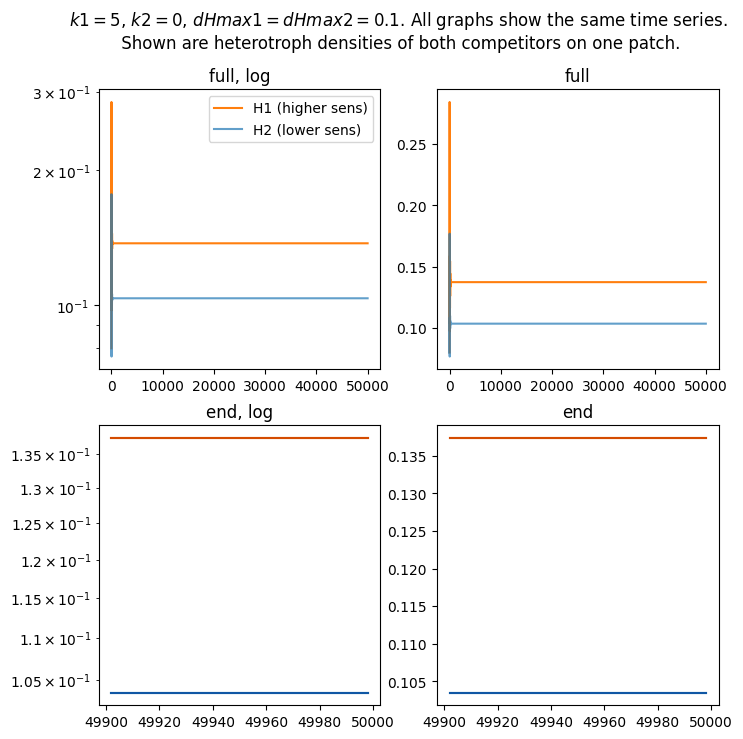

In [ ]:
t_end = 50000
number_steps = 25000
t = np.linspace(0, t_end, number_steps)
k_1 = 5
k_2 = 0
d_Hmax1 = 10**-1
d_Hmax2 = 10**-1
#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 0.08, 0.4, 0, 0, 0, 0, 0, 0]
#plt.figure(figsize=(8,8))
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(8,8))
ax1.set_title("full, log")
ax1.plot(t[-25000:-1], (var[-25000:-1:, 4]),label="H1 (higher sens)", color="#FF7F0E")
ax1.plot(t[-25000:-1], (var[-25000:-1:, 6]), label="H2 (lower sens)", color="#1F77B4", alpha=0.7)
ax1.set_yscale("log")
ax1.legend()
ax2.set_title("full")
ax2.plot(t[-25000:-1], (var[-25000:-1:, 4]), color="#FF7F0E")
ax2.plot(t[-25000:-1], (var[-25000:-1:, 6]), color="#1F77B4", alpha=0.7)
ax3.set_title("end, log")
ax3.plot(t[-50:-1], (var[-50:-1:, 4]), color="#FF7F0E")
ax3.plot(t[-50:-1], (var[-50:-1:, 5]), color="#D44B00")
ax3.plot(t[-50:-1], (var[-50:-1:, 6]), color="#1F77B4")
ax3.plot(t[-50:-1], (var[-50:-1:, 7]), color="#0F57A4")
ax3.set_yscale("log")
ax4.set_title("end")
ax4.plot(t[-50:-1], (var[-50:-1:, 4]), color="#FF7F0E")
ax4.plot(t[-50:-1], (var[-50:-1:, 5]), color="#D44B00")
ax4.plot(t[-50:-1], (var[-50:-1:, 6]), color="#1F77B4")
ax4.plot(t[-50:-1], (var[-50:-1:, 7]), color="#0F57A4")
plt.suptitle("$k1 = $" + str(k_1) + ", $k2 = $" + str(k_2) + 
             ", $dHmax1 = dHmax2 = $" + repr(d_Hmax1) + 
             ". All graphs show the same time series."  
             "\n Shown are heterotroph densities of both competitors on one patch.")

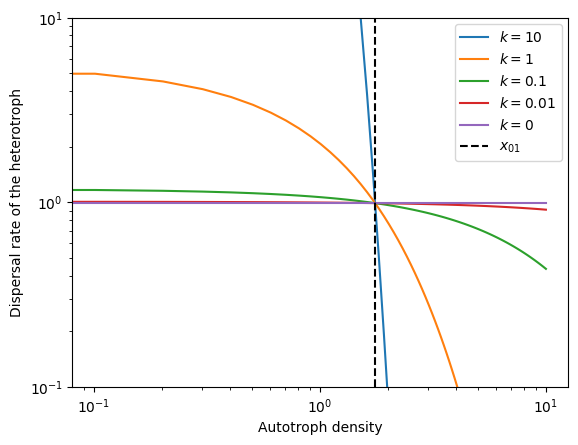

In [ ]:
d_Hmax1 = 0.01
A_a_range = np.linspace(0, 10, 100)
x_01 = 0.3 / (1 * (0.33 - 0.53 * 0.3))
def dispersalrate(A_a):
    d_H1a = 1 / (d_Hmax1 + np.exp(k * (A_a - x_01)))
    return (A_a, d_H1a)

k = 10
res10 = np.array([dispersalrate(a) for a in A_a_range])
plt.plot(res10[:,0],res10[:,1], label="$k = $" + str(k))
k = 1
res1 = np.array([dispersalrate(a) for a in A_a_range])
plt.plot(res1[:,0],res1[:,1], label="$k = $" + str(k))
k = 0.1
res01 = np.array([dispersalrate(a) for a in A_a_range])
plt.plot(res01[:,0],res01[:,1], label="$k = $" + str(k))
k = 0.01
res001 = np.array([dispersalrate(a) for a in A_a_range])
plt.plot(res001[:,0],res001[:,1], label="$k = $" + str(k))
k = 0
res0 = np.array([dispersalrate(a) for a in A_a_range])
plt.plot(res0[:,0],res0[:,1], label="$k = $" + str(k))
plt.axvline(x=x_01, color='black', linestyle='--', label="$x_{01}$")
plt.yscale('log')
plt.xscale('log')
plt.ylim(10**-1,10)
plt.xlabel('Autotroph density')
plt.ylabel('Dispersal rate of the heterotroph')
plt.legend()

## Invader

* At which value for the sensitivity $k$, can competitior 1 invade the resident population at fixation of the non-sensitive (randomly dispersing) competitor 2?
* Also, how does this change for increasing values of $k$ for both competitors?
* What time scale is appropriate to describe a successful invasion? (E.g. if not invaded after 20k+ time steps it's not a successful invasion)
* What is an appropriate density for an invader? Extinction threshold was earlier discussed to be at $10^{-6}$. 

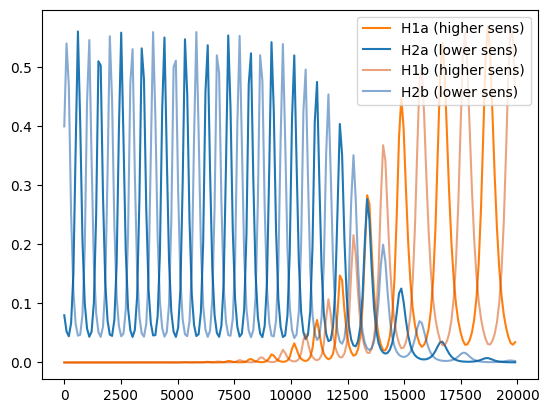

In [55]:
t_end = 20000
number_steps = 200
t = np.linspace(0, t_end, number_steps)
k_1 = 2 # 2
k_2 = 0 # 0
d_Hmax1 = 10**-2
d_Hmax2 = 10**-2
#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
#var0 = [2, 2.5, 2.5, 2, 0, 0, 0.4, 0.08, 0, 0, 0, 0, 0, 0]
var0 = [2, 2.5, 2.5, 2, 10**-6, 0, 0.08, 0.4, 0, 0, 0, 0, 0, 0]
#plt.figure(figsize=(8,8))
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

plt.plot(t[-25000:-1], (var[-25000:-1:, 4]),label="H1a (higher sens)", color="#FF7F0E")
plt.plot(t[-25000:-1], (var[-25000:-1:, 6]), label="H2a (lower sens)", color="#1F77B4")
plt.plot(t[-25000:-1], (var[-25000:-1:, 5]),label="H1b (higher sens)", color="#D44B00", alpha = 0.5)
plt.plot(t[-25000:-1], (var[-25000:-1:, 7]), label="H2b (lower sens)", color="#0F57A4", alpha = 0.5)
#plt.yscale("log")
plt.legend()

In [ ]:
# start timeseries with densities of H2 at fixation (e.g. 10000 time steps)
# not sure if necessary because no transient dynamics visible?
fixH_2a = var[-1, 6]
fixH_2b = var[-1, 7]

At $d_{Hmax} = 10^{-3}$, a rare mutant can not invade the system regardless of sensitivity of both competitors (even at $k_1 = 15$ and  $t_{end} = 200k$)
This changes at $d_{Hmax} = 10^{-2}$. Here, the rare mutant can invade the the randomly dispersing resident if the mutant has a higher sensitivity than the resident competitor.  
If $d_{Hmax} > 10^{-2}$ invasions remain possible, but become static for higher values.

It may be possible to calculate pips similar to how I implemented early density heatmaps.  
<br>
**Workflow**:  
* Run simulation with resident $H_1$ until fixation.
* Grab densities from resident $H_1$ at last time step (at fixation).
* Run simulation with resident $H_1$ at fixation and introduce mutant $H_2$ at low density on one patch ($10^{-6}$)
* Plot relationship of the total densities of $H_1$ and $H_2$ at the last time step (e.g. $H_1 - H_2$).
  * If the value is positive there was no invasion, and if the value is negative there was an invasion. 

In [ ]:
t_end = 15000 #4000  # 100000
number_steps = 2000 #2000  # 25000
t = np.linspace(0, t_end, number_steps)
# dispersal adaptability
k_1 = 0
k_2 = 0
k_1_range = np.geomspace(0.1, 10, 50)
k_2_range = np.geomspace(0.1, 10, 50)
# maximum dispersal rate
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3
d_Hmax1_range = np.logspace(-3, -1, 250)
d_Hmax2_range = k_1_range # d_Hmax1_range

# var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 0, 0, 0, 0, 0, 0, 0]
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)

In [ ]:
meandensity_H1x = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))
meandensity_H1y = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))
meandensity_H2x = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))
meandensity_H2y = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))
total_H1 = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))
total_H2 = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))
invasion = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))

In [ ]:
# Integrating over two variable parameters
# change for new method with equation wrapper

var = []

i = 0
j = 0

for k_2 in tqdm(k_2_range):
    j = 0
    for k_1 in k_1_range:
        model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
        var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

        # results[i,j] = ...
        meandensity_H1x[i, j] = np.mean(var[-200:-1, 4])
        meandensity_H1y[i, j] = np.mean(var[-200:-1, 5])
        meandensity_H2x[i, j] = np.mean(var[-200:-1, 6])
        meandensity_H2y[i, j] = np.mean(var[-200:-1, 7])
        total_H1[i, j] = np.mean(var[-200:-1, 4]) + np.mean(var[-200:-1, 5])
        total_H2[i, j] = np.mean(var[-200:-1, 6]) + np.mean(var[-200:-1, 7])
        invasion[i, j] = total_H1[i, j] - total_H2[i, j]

        j += 1
    i += 1

100%|██████████| 50/50 [1:21:29<00:00, 97.79s/it] 


In [57]:
#invasion = (meandensity_H1x+meandensity_H1y) - (meandensity_H2x+meandensity_H2y)
#np.savetxt("./data/invasion10-3.csv", invasion, delimiter=",")
#invasion = np.loadtxt("./data/invasion10-2.csv", delimiter=",")
invasion

array([[ 0.41662246,  0.41716553,  0.41800177, ...,  0.41888256,
         0.41848133,  0.4182314 ],
       [ 0.41662236,  0.41716544,  0.41800168, ...,  0.41888255,
         0.41848131,  0.4182314 ],
       [ 0.41662225,  0.41716536,  0.41800159, ...,  0.41888257,
         0.41848127,  0.41823141],
       ...,
       [-0.419646  , -0.41974593, -0.41979153, ...,  0.41887741,
         0.41847694,  0.41822763],
       [-0.41981951, -0.41978374, -0.41969943, ...,  0.41887644,
         0.41847612,  0.41822693],
       [-0.41970848, -0.41958742, -0.41941254, ...,  0.41887552,
         0.4184754 ,  0.41822626]])

In [ ]:
k_1_range
ticks = np.append(k_1_range, 10)

Text(0.1, -0.05, 'simname: invasion10-3')

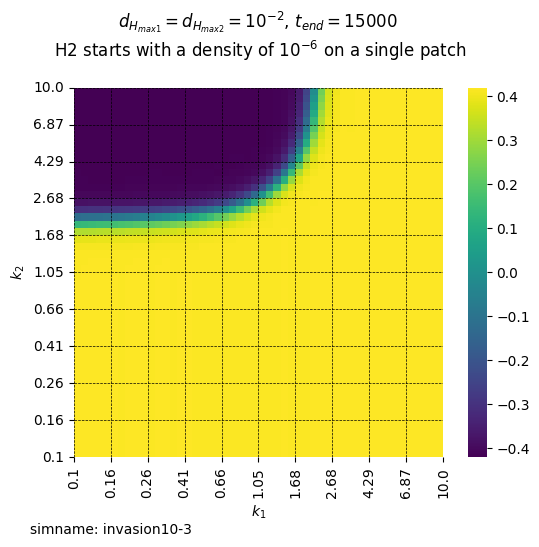

In [ ]:
ax1 = sns.heatmap(invasion, cmap="viridis", square = True) #
ax1.set_xticks(np.linspace(0, len(k_1_range), 11))
ax1.set_yticks(np.linspace(0, len(k_1_range), 11))
ax1.invert_yaxis()
ax1.set_xticklabels(np.round(ticks[::5], 2))
ax1.set_yticklabels(np.round(ticks[::5], 2))
plt.grid(color='black', linewidth=0.5, linestyle='--')
plt.xlabel('$k_1$')
plt.ylabel('$k_2$')
plt.title('$d_{H_{max1}} = d_{H_{max2}} = 10^{-2}$, $t_{end} = 15000$ \n H2 starts with a density of $10^{-6}$ on a single patch \n')
plt.figtext(0.1, -0.05, "simname: invasion10-3")

Text(0.15, -0.05, 'simname: invasion10-3')

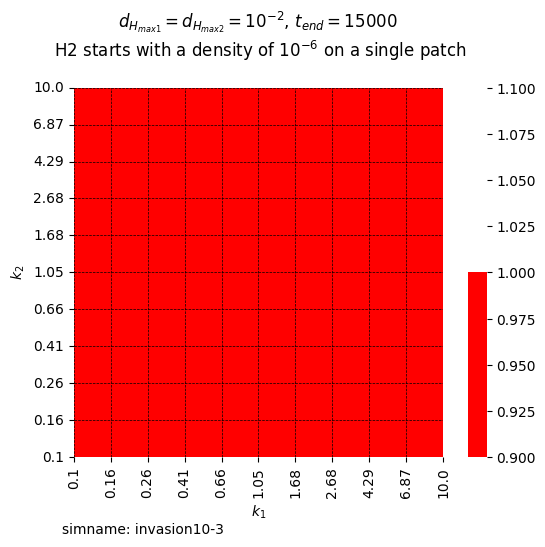

In [ ]:
pipvasion = np.where(invasion >= 0, 1, 0)
ax1 = sns.heatmap(pipvasion, cmap=sns.color_palette(["red", "white"]), cbar=True, square = True) #
ax1.set_xticks(np.linspace(0, len(k_1_range), 11))
ax1.set_yticks(np.linspace(0, len(k_1_range), 11))
ax1.invert_yaxis()
ax1.set_xticklabels(np.round(ticks[::5], 2))
ax1.set_yticklabels(np.round(ticks[::5], 2))
plt.grid(color='black', linewidth=0.5, linestyle='--')
plt.xlabel('$k_1$')
plt.ylabel('$k_2$')
plt.title('$d_{H_{max1}} = d_{H_{max2}} = 10^{-2}$, $t_{end} = 15000$ \n H2 starts with a density of $10^{-6}$ on a single patch \n')
plt.figtext(0.15, -0.05, "simname: invasion10-3")

At 10-3 no invasions possible at all. Even at same or higher sensitivity discrepancy, recovery from low densities is not possible.

Find max dispersal speed dHmax at which invasions are possible (at some point between 10-3 and 10-2)

- Do the above again but for longer  
- Do above again for intermediate dHmax e.g. 5x10^-3  
    - how do invasions change over a range of dHmax (between 10-3 and 10-2 because here, its changing)
    - time series for # of invasions (e.g. number of negative values) over a range of dHmax 
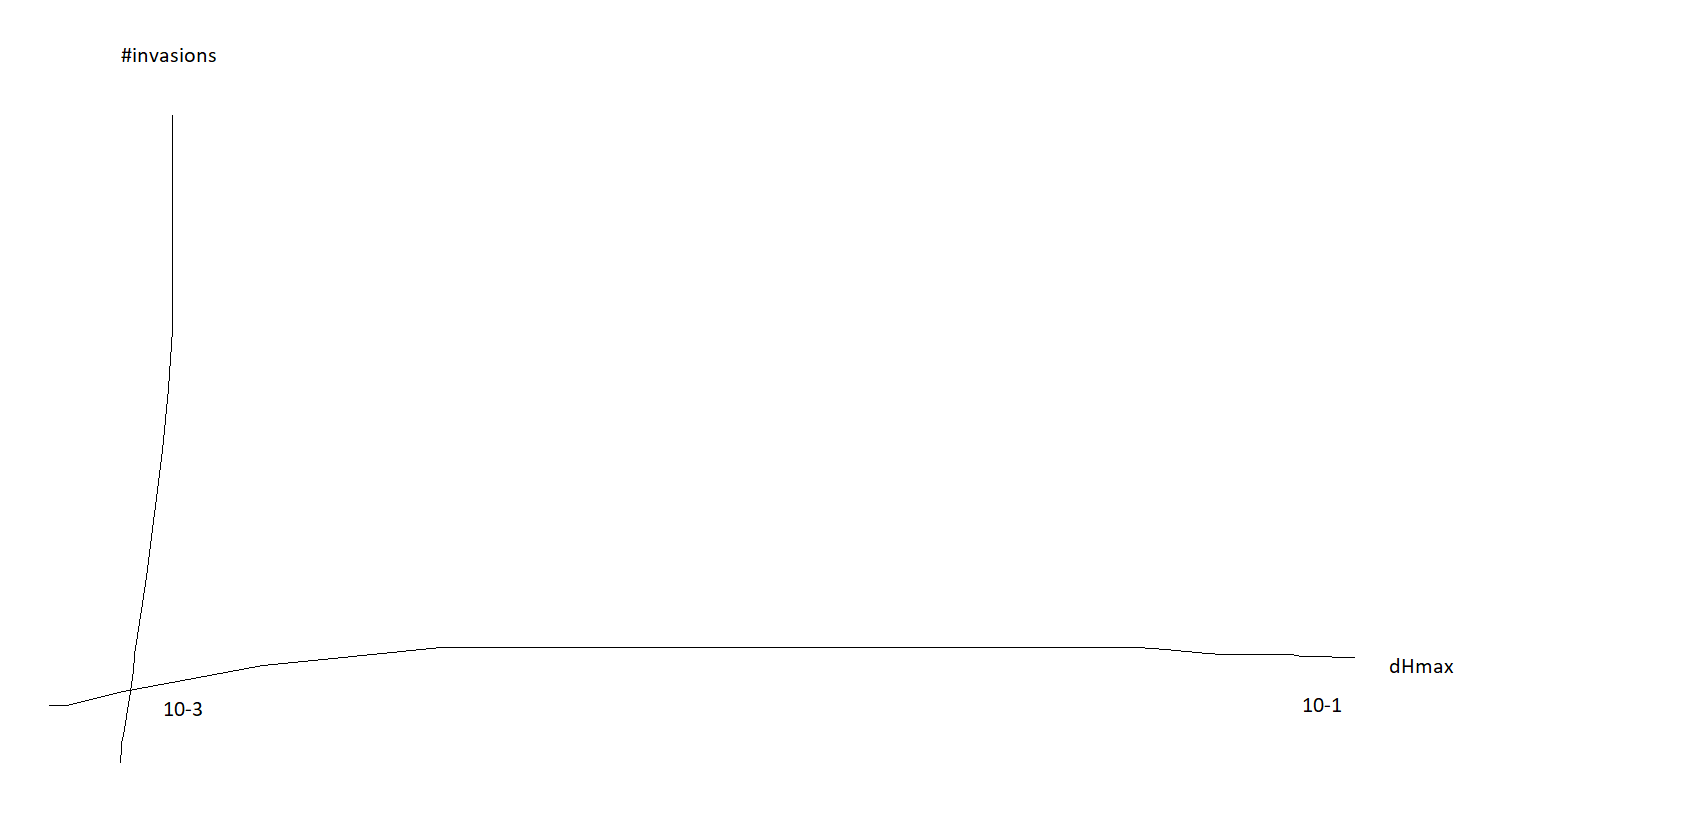  

In [5]:
t_end = 15000 #4000  # 100000
number_steps = 2000 #2000  # 25000
t = np.linspace(0, t_end, number_steps)
# dispersal adaptability
k_1 = 0
k_2 = 0
k_range = np.geomspace(0.1, 10, 5)
# maximum dispersal rate
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3
d_Hmax_range = np.logspace(-3, -1, 10)

# var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 0, 0, 0, 0, 0, 0, 0]
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)

In [6]:
meandensity_H1x = np.zeros((len(k_range), len(k_range), len(d_Hmax_range)))
meandensity_H1y = np.zeros((len(k_range), len(k_range), len(d_Hmax_range)))
meandensity_H2x = np.zeros((len(k_range), len(k_range), len(d_Hmax_range)))
meandensity_H2y = np.zeros((len(k_range), len(k_range), len(d_Hmax_range)))
total_H1 = np.zeros((len(k_range), len(k_range), len(d_Hmax_range)))
total_H2 = np.zeros((len(k_range), len(k_range), len(d_Hmax_range)))
invasion = np.zeros((len(k_range), len(k_range), len(d_Hmax_range)))
invasion_sum = np.zeros(len(d_Hmax_range))

In [11]:
var = []

i = 0
j = 0
k = 0

for d_Hmax1 in tqdm(d_Hmax_range):
    i = 0
    d_Hmax2 = d_Hmax1
    for k_2 in k_range:
        j = 0
        for k_1 in k_range:
            model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
            var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

            total_H1[i, j, k] = np.mean(var[-200:-1, 4]) + np.mean(var[-200:-1, 5])
            total_H2[i, j, k] = np.mean(var[-200:-1, 6]) + np.mean(var[-200:-1, 7])
            invasion[i, j, k] = total_H1[i, j, k] - total_H2[i, j, k]
            j += 1
        i += 1
    invasion_sum[k] = np.sum(invasion[:,:,k]<0)
    k += 1

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [06:54<00:00, 41.40s/it]


In [7]:
#np.savetxt("./data/invasionsum/invasion.csv", invasion, delimiter=",")
#np.savetxt("./data/invasionsum/invasion_sum.csv", invasion_sum, delimiter=",")
invasion_sum = np.loadtxt("./data/invasionsum/invasion_sum.csv", delimiter=",")

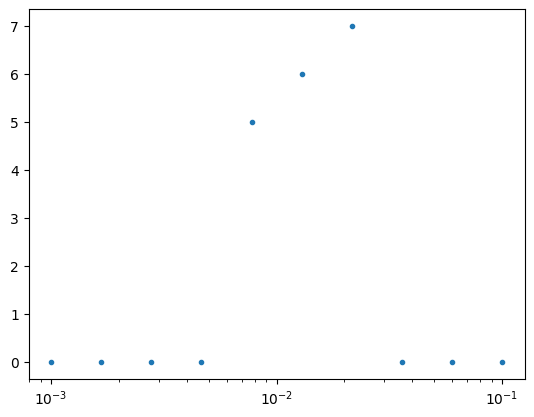

In [8]:
plt.plot(d_Hmax_range, invasion_sum, ".")
plt.xscale("log")

do this in C i guess  
otherwise it would take 24 hours or so